<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-Simple-Example-of-Clustering" data-toc-modified-id="A-Simple-Example-of-Clustering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A Simple Example of Clustering</a></span><ul class="toc-item"><li><span><a href="#Import-the-relevant-libraries" data-toc-modified-id="Import-the-relevant-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import the relevant libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Plot-the-data" data-toc-modified-id="Plot-the-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot the data</a></span></li><li><span><a href="#Select-the-features" data-toc-modified-id="Select-the-features-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Select the features</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#Clustering-Resutls" data-toc-modified-id="Clustering-Resutls-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Clustering Resutls</a></span></li></ul></li></ul></li></ul></div>

# A Simple Example of Clustering 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

Try with other numbers of clusters and see if they match your expectations. Maybe 7 is going to be a cool one!

Plot the data using the <i> c </i> parameter to separate the data by the clusters we defined.  

<i> Note: c stands for color <i>

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import sklearn

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
sns.set()

# seaborn warnings ignore
import warnings
warnings.filterwarnings('ignore')

# Jupyter notebook settings for pandas
pd.set_option('display.float_format', '{:,.2f}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 100)

In [2]:
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries.csv'</i>.


In [3]:
!ls ../data/csv

Bank-data-testing.csv                Example-bank-data.csv                real_estate_price_size_year_view.csv
Bank-data.csv                        real_estate_price_size.csv
Countries-exercise.csv               real_estate_price_size_year.csv


In [4]:
df = pd.read_csv('../data/csv/Countries-exercise.csv')
print(df.shape)
df.head()

(241, 3)


,name,Longitude,Latitude
0,Aruba,-69.98,12.52
1,Afghanistan,66.00,33.84
2,Angola,17.54,-12.29
3,Anguilla,-63.06,18.22
4,Albania,20.05,41.14


## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

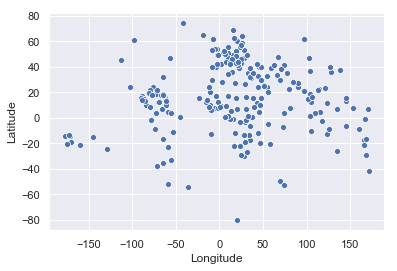

In [5]:
sns.scatterplot(data=df,x='Longitude',y='Latitude')

## Select the features

Create a copy of that data and remove all parameters apart from <i>Longitude</i> and <i>Latitude</i>.

In [6]:
X = df.iloc[:,1:3].copy()
X.head()

,Longitude,Latitude
0,-69.98,12.52
1,66.00,33.84
2,17.54,-12.29
3,-63.06,18.22
4,20.05,41.14


## Clustering

Assume there are only two clusters. 

In [7]:
kmeans = KMeans(3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Clustering Resutls

In [8]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2,
       0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1,
       1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1],
      dtype=int32)

In [9]:
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters.head()

,name,Longitude,Latitude,Cluster
0,Aruba,-69.98,12.52,2
1,Afghanistan,66.00,33.84,1
2,Angola,17.54,-12.29,1
3,Anguilla,-63.06,18.22,2
4,Albania,20.05,41.14,1


Did you remember to use the <i> c </i> parameter to separate the data by the clusters we defined?

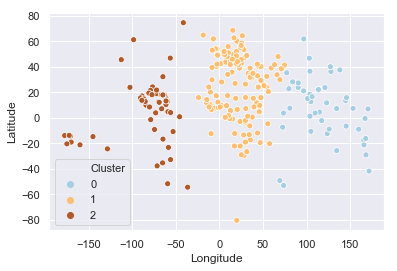

In [10]:
sns.scatterplot(data=data_with_clusters, x='Longitude',y='Latitude',hue='Cluster',palette='Paired');

If you haven't, go back and play around with the number of clusters. 

Try 3, 7 and 8 and see if the results match your expectations!